In [2]:
#Import libraries
import numpy as np
from array import array
import matplotlib.pyplot as plt

In [3]:
# ==========================
# FUNCTION: isolate(array, wn)
def isolate(array, wn):
    fwd = np.fft.rfft(array)
    fwd[0:wn] = 0.0
    fwd[wn+1:] = 0.0
    return np.fft.irfft(fwd)
# ==========================

# ==========================
# FUNCTION: transform(array, wn)
def transform(array, wn):
    fwd = np.fft.rfft(array)
    fwd[wn:] = 0.0
    return np.fft.irfft(fwd)
# ==========================

# ==========================
# FUNCTION: power(array)
def power(array):
    return np.abs(np.fft.rfft(array))**2
# ==========================

In [4]:
# ==========================
# PROGRAM INITIALIZATION
# Define constants for later use.
points = 100 #gridpts
dx = 10000 #m
t = 100000 #s
U = 10 #m/s
dt = 100 #Courant = .1
a= 100
b = 50 #inital grid
c = 3
K= 3000 #diffusion coefficient 

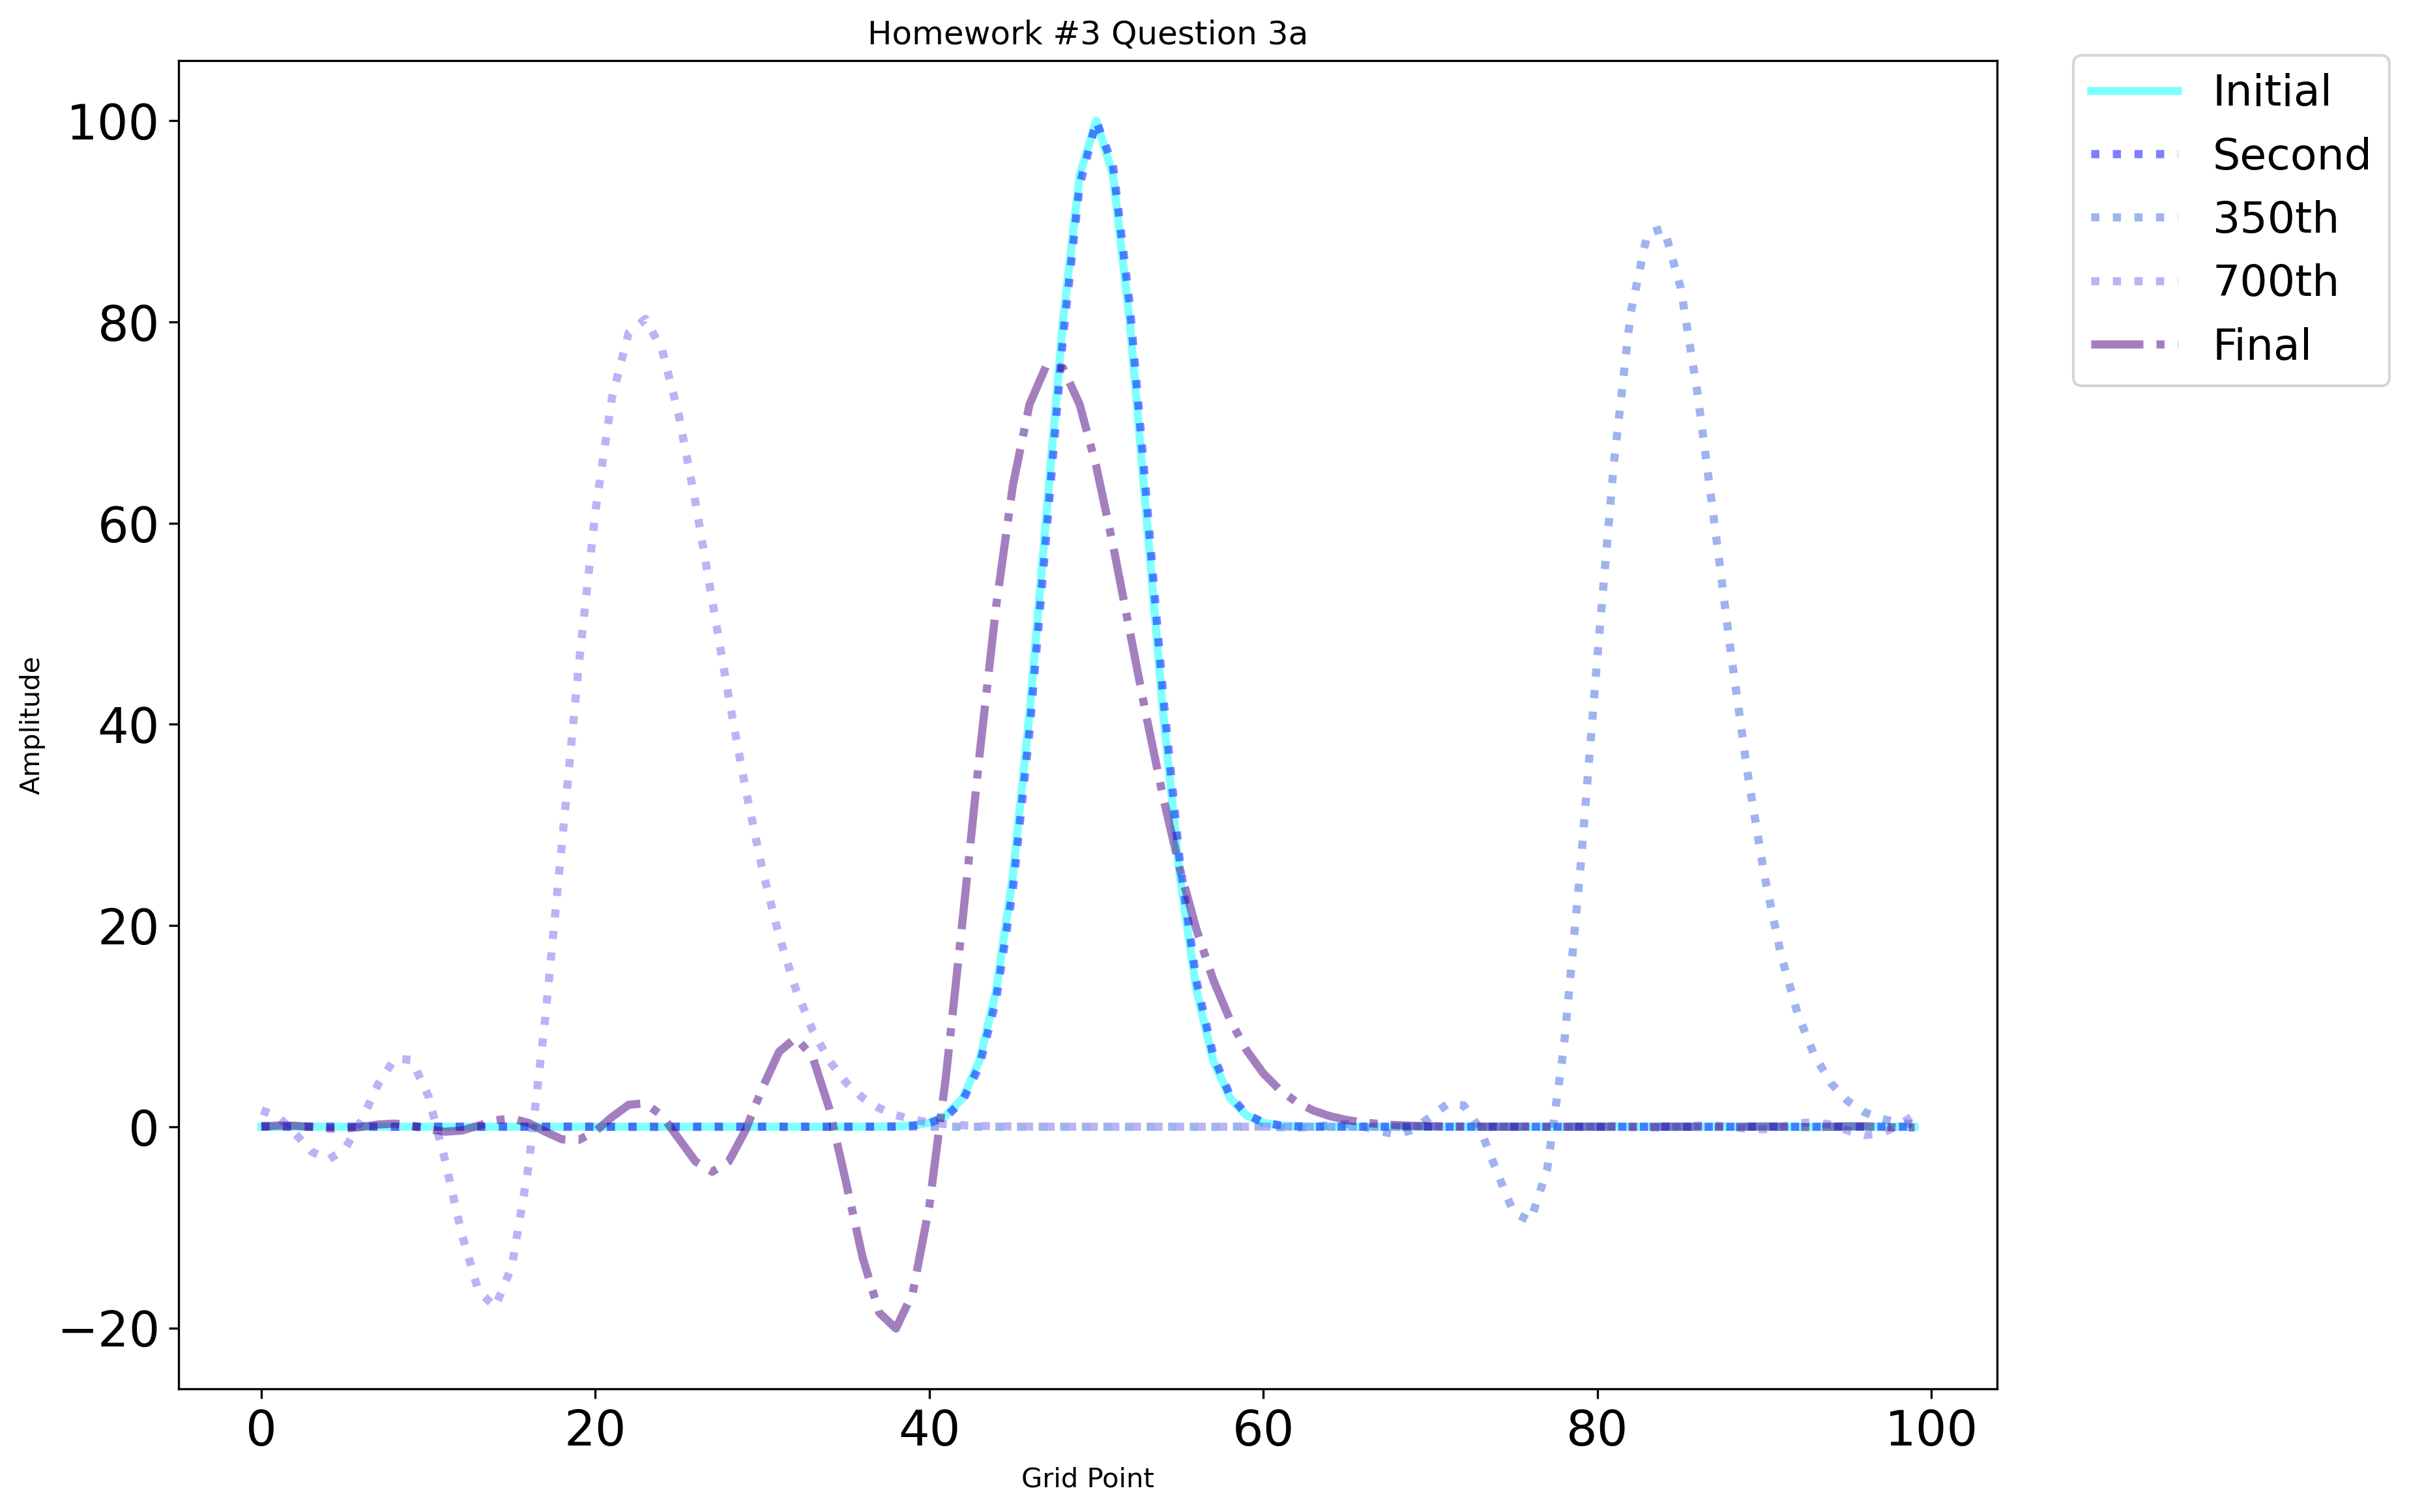

In [5]:
#set up empty 2-D array for finite diff eq and gridpts
h= np.zeros([1001, 100])
h1= np.zeros([1001, 100])
h2= np.zeros([1001, 100])
x = np.arange(points)

#set up initial conditions for gaussian wave
h[0,:] = a * np.exp(-(x-b)**2/(2*c**2))
h1[0,:] = a * np.exp(-(x-b)**2/(2*c**2))

#given C = .1 , dt = 100       
#final timesteps = t/dt = 1000, gridpoints = j = 100 
for i in range (0, 1):
    for j in range (0, 100):
        #Correct for grid boundary starting at grid pt 50
        x1=j
        #finite difference equation
        if x1==0:
            h[i+1,0] = h[i,0]-((dt*U)*((h[i,1]-h[i,99])/(2*dx))) + dt*(K/dx**2)*(h[i,1] + h[i,99]-2*h[i,x1])  
        elif x1==99:
            h[i+1,x1] = h[i,x1]-((dt*U)*((h[i,0]-h[i,98])/(2*dx)))+ dt*(K/dx**2)*(h[i,0] + h[i,98]-2*h[i,x1])  
        else:
            h[i+1,x1] = h[i,x1]-((dt*U)*((h[i,x1+1]-h[i,x1-1])/(2*dx)))+ dt*(K/dx**2)*(h[i,x1+1] + h[i,x1-1]-2*h[i,x1])  
              
for i in range (1, 1000):
    for j in range (0, 100):
        x1=j
        #finite difference equation
        if x1 ==0:
            h[i+1,x1] = h[i-1,x1]-((dt*U)*((h[i,1]-h[i,99])/(dx))) + dt*(K/dx**2)*(h[i-1,1] + h[i,99]-2*h[i-1,x1])  
        elif x1==99:
            h[i+1,x1] = h[i-1,x1]-((dt*U)*((h[i,0]-h[i,98])/(dx))) + dt*(K/dx**2)*(h[i-1,0] + h[i,98]-2*h[i-1,x1])  
        else:
            h[i+1,x1] = h[i-1,x1]-((dt*U)*((h[i,x1+1]-h[i,x1-1])/(dx))) + dt*(K/dx**2)*(h[i-1,x1+1] + h[i-1,x1-1]-2*h[i-1,x1])        

#Plot figure 
fig1 = plt.figure(figsize=(12,9), dpi=300)
ax = plt.axes()
plt.title("Homework #3 Question 3a")
plt.xlabel("Grid Point")
plt.ylabel("Amplitude") 
ax.plot(h[0,:], linestyle='solid', color='cyan', alpha=.5,linewidth=3, label='Initial')
ax.plot(h[1,:], linestyle='dotted', color='blue', alpha=.5, linewidth=3, label='Second')
ax.plot(h[349,:], linestyle='dotted', color='royalblue', alpha=.5, linewidth=3, label='350th')
ax.plot(h[749,:], linestyle='dotted', color='mediumslateblue', alpha=.5, linewidth=3, label='700th')
ax.plot(h[999,:], linestyle='dashdot', color='indigo', alpha=.5, linewidth=3, label='Final')
ax.tick_params(axis='both', labelsize=18)
legend = plt.legend(fontsize=16, bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.show()

Question 3a) In this model, the ampltiude of the leading wave decreases with time. In addition, the width of each wave increases and so do the amplitude and frequency of trailing waves. When comparing the final wave to that of question 1a, the final wave appears to be similiar to the C=.1 final run, but with a small ampltiude for the leading wave and trailing waves compared with 1a. 

Question 3b) Figure 3.34 depicts the dampening rate different even order diffusions, to demonstrate the varying rates at which smaller wavelengths are dampended. For the 2nd order, wavelengths at 2dx are completely dampened out, 50% of 4dx wavelenghts dampended, and 20% of 8dx wavelengths are dampened. This model also uses the lower order diffusion, which results in overall more dampening of these smaller wavelengths relative to higher order diffusions. This is likely why we see the ampltiude of the final run of this model being slightly smalelr than 1a, as it experienced more overall dampening. 


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


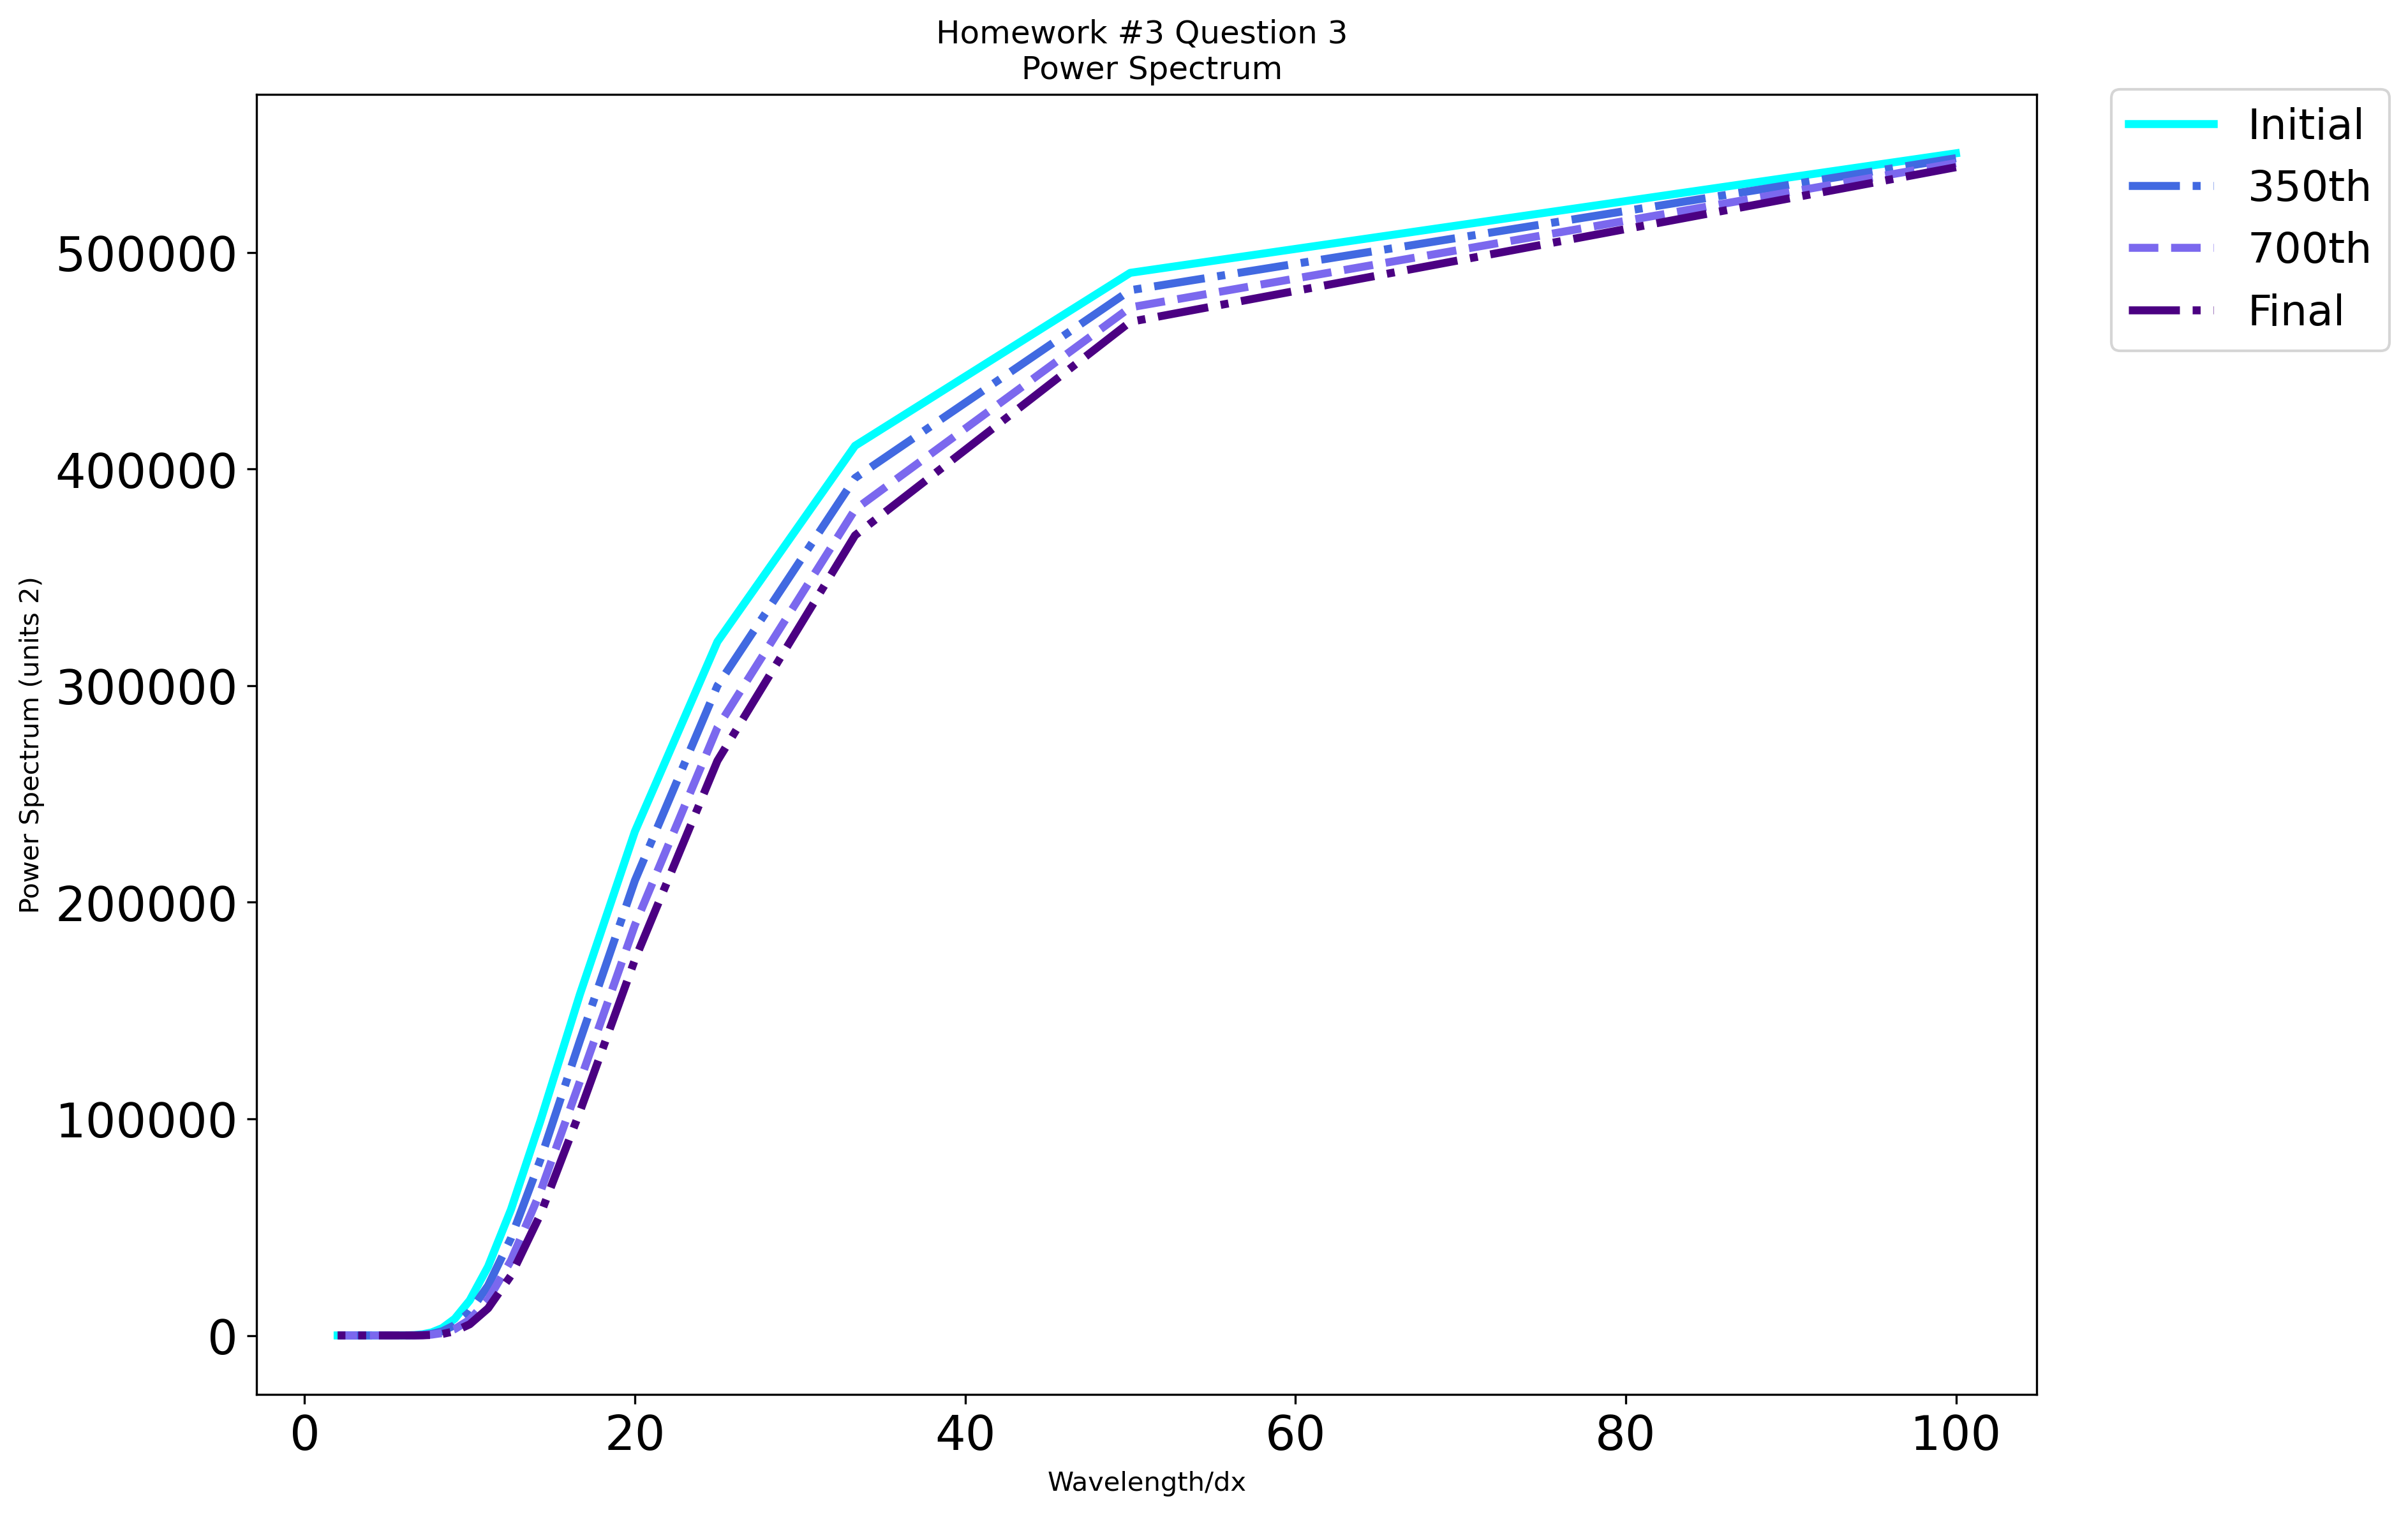

In [6]:
#call power spectrum function
ps0= power(h[0,:])
ps4= power(h[1,:])
ps8= power(h[349,:])
ps10= power(h[699,:])
ps12= power(h[999,:])

freqs = np.fft.rfftfreq(x.size, dx)

#Plot figure for power spectrum
fig1 = plt.figure(figsize=(12,9), dpi=300)
ax = plt.axes()
#plt.ylim([0,25000])
#plt.xlim([10,15])
plt.title("Homework #3 Question 3 \n Power Spectrum")
plt.xlabel("Wavelength/dx")
plt.ylabel("Power Spectrum (units 2)")
ax.plot(1/freqs/dx, ps0, linestyle='solid', color='cyan', linewidth=3, label='Initial')
#ax.plot(1/freqs/dx, ps4, linestyle='dotted', color='deepskyblue', linewidth=3, label='Second')
ax.plot(1/freqs/dx, ps8, linestyle='dashdot', color='royalblue', linewidth=3, label='350th')
ax.plot(1/freqs/dx, ps10, linestyle='dashed', color='mediumslateblue', linewidth=3, label='700th')
ax.plot(1/freqs/dx, ps12, linestyle='dashdot', color='indigo', linewidth=3, label='Final')
ax.tick_params(axis='both', labelsize=18)
legend = plt.legend(fontsize=16, bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.show()

Question 3c) This supports the analysis from the initial graph. The power spectrum depicts dampening of the power spectrum with each run of the model. Additionally, demonstrates zero energy being depicted at the small wavelengths from 0-~8. It also shows the models converging at larger wavelengths, illustrating that the model dampened a lot at smaller wavelengths and little dampening of the larger wavelengths. This observation supports the observations made in 3b, as the final run of the model experienced the greatest amount of dampening at small wavelengths. 

